In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [14]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',  # 그래프 색
              font='Malgun Gothic',  # 한글 글꼴
              rc=custom_params)

In [3]:
df = pd.read_csv('tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
print(df.shape)
df.describe()

(244, 7)


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
tip_g_s = df['tip'].groupby(df['sex'])  # 성별을 기준으로 팁 묶음
tip_g_s.mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

In [7]:
tip_g_s.size()  # 성별에 따른 데이터 량(팁 횟수)

sex
Female     87
Male      157
Name: tip, dtype: int64

In [8]:
sex = dict(tip_g_s.mean())
sex

{'Female': 2.833448275862069, 'Male': 3.0896178343949043}

In [9]:
x = list(sex.keys())
x

['Female', 'Male']

In [10]:
y = list(sex.values())
y

[2.833448275862069, 3.0896178343949043]

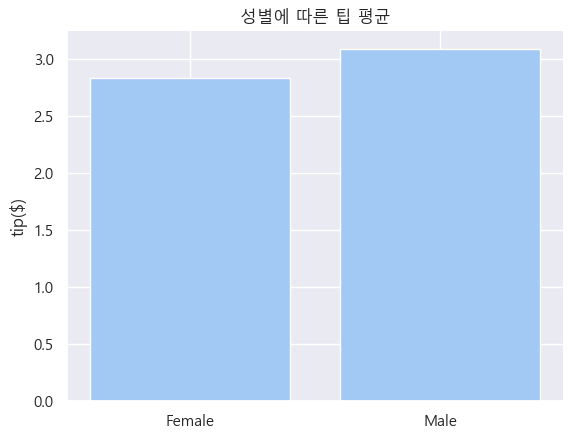

In [19]:
plt.bar(x=x, height=y)
plt.ylabel('tip($)')
plt.title('성별에 따른 팁 평균')
plt.show()

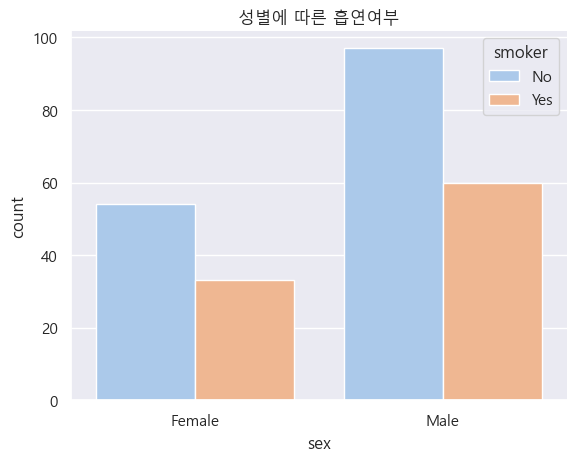

In [18]:
sns.countplot(x='sex', data=df, hue='smoker')
plt.title('성별에 따른 흡연여부')
plt.show()

In [21]:
tip_d = df['tip'].groupby(df['day'])
tip_d.mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

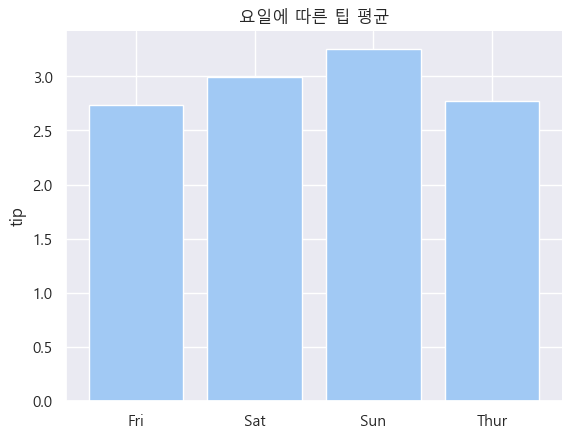

In [22]:
plt.bar(x=tip_d.mean().index, height=tip_d.mean().values)
plt.ylabel('tip')
plt.title('요일에 따른 팁 평균')
plt.show()

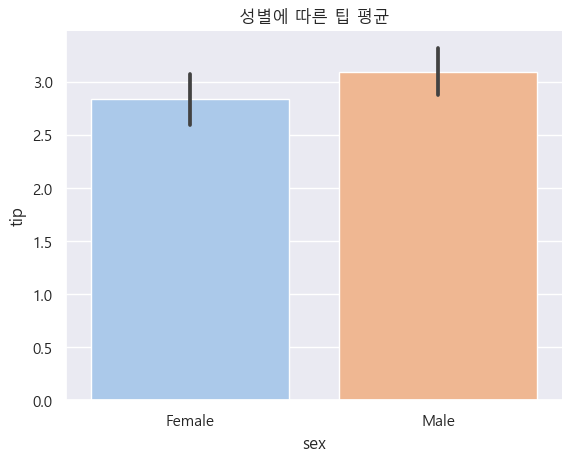

In [24]:
sns.barplot(data=df, x='sex', y='tip')
plt.title("성별에 따른 팁 평균")
plt.show()

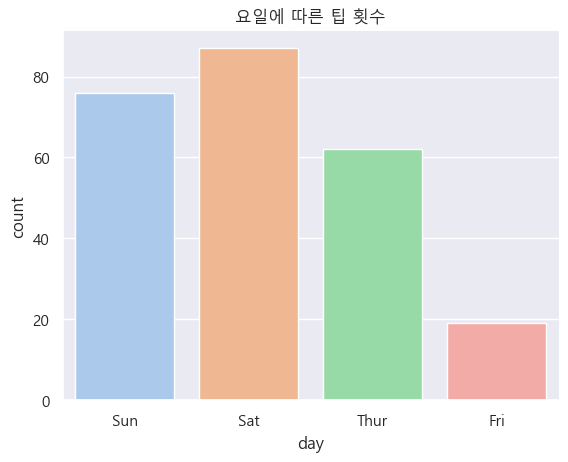

In [26]:
sns.countplot(x="day", data=df)
plt.title("요일에 따른 팁 횟수")
plt.show()

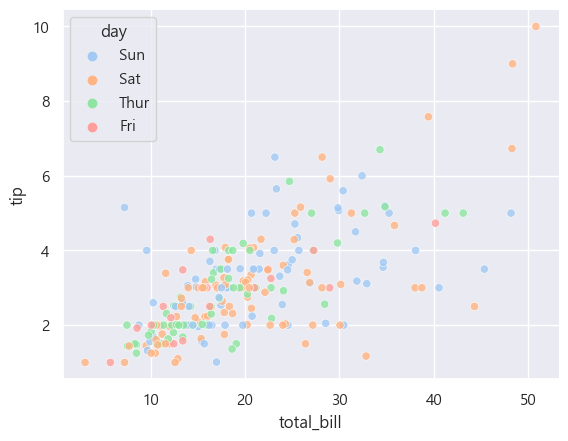

In [39]:
sns.scatterplot(data=df, x='total_bill', y='tip', color='lime', alpha=0.8, hue='day')
plt.show()